In [1]:
import nltk
nltk.download('all',halt_on_error=False)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#nltk
import nltk

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for part-of-speech tagging
from nltk import pos_tag

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#model_selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

#preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#modelling algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
··········


In [4]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
train=pd.read_csv(r'drive/Colab Notebooks/spooky author/train.csv')
test=pd.read_csv(r'drive/Colab Notebooks/spooky author/test.csv')

In [0]:
df=train.copy()

In [7]:
print(df.shape)
df.head()

(19579, 3)


,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [8]:
print(df.author.isnull().sum())  # no null values
df.text.isnull().sum()

0


0

In [9]:
print(test.shape)
test.head()

(8392, 2)


,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [10]:
# checking null values in test set.
print(test.text.isnull().sum())  # no null values
 

0


In [11]:
# back to training set.
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [0]:
# drop the id column.
df.drop(['id'],axis=1,inplace=True)

In [13]:
df.head(10)

,text,author
0,"This process, however, afforded me no means of...",EAP
1,It never once occurred to me that the fumbling...,HPL
2,"In his left hand was a gold snuff box, from wh...",EAP
3,How lovely is spring As we looked from Windsor...,MWS
4,"Finding nothing else, not even gold, the Super...",HPL
5,"A youth passed in solitude, my best years spen...",MWS
6,"The astronomer, perhaps, at this point, took r...",EAP
7,The surcingle hung in ribands from my body.,EAP
8,I knew that you could not say to yourself 'ste...,EAP
9,I confess that neither the structure of langua...,MWS


In [0]:
# exploring.
'''

let us now see some worko f each author and see if we can figure out any patterns in their writing.

'''

eap_df=df.loc[df.author=='EAP','text']

In [15]:
print("Author EAP:","\n")
for i,text in enumerate(eap_df):
  print(text,"\n")
  if(i==4):                 # no conclusions.
    break

Author EAP: 

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall. 

In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction. 

The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and here analogy was suddenly let fall. 

The surcingle hung in ribands from my body. 

I knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of Epicurus; and since, when we discussed this subject not very long ago, I mentioned to you how singularly, yet with how little notice, the vague guesses of that noble Greek had met with confirmation in the late nebular cosmogony, I felt that you c

In [16]:
hpl_df=df.loc[df.author=='HPL','text']
print("Author HPL:","\n")
for i,text in enumerate(hpl_df):
  print(text,"\n")
  if(i==4):                 # no conclusions.
    break

Author HPL: 

It never once occurred to me that the fumbling might be a mere mistake. 

Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk. 

Herbert West needed fresh bodies because his life work was the reanimation of the dead. 

The farm like grounds extended back very deeply up the hill, almost to Wheaton Street. 

His facial aspect, too, was remarkable for its maturity; for though he shared his mother's and grandfather's chinlessness, his firm and precociously shaped nose united with the expression of his large, dark, almost Latin eyes to give him an air of quasi adulthood and well nigh preternatural intelligence. 



In [17]:
mws_df=df.loc[df.author=='MWS','text']
print("Author MWS:","\n")
for i,text in enumerate(mws_df):
  print(text,"\n")
  if(i==4):                 # no conclusions.
    break

Author MWS: 

How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair. 

A youth passed in solitude, my best years spent under your gentle and feminine fosterage, has so refined the groundwork of my character that I cannot overcome an intense distaste to the usual brutality exercised on board ship: I have never believed it to be necessary, and when I heard of a mariner equally noted for his kindliness of heart and the respect and obedience paid to him by his crew, I felt myself peculiarly fortunate in being able to secure his services. 

I confess that neither the structure of languages, nor the code of governments, nor the politics of various states possessed attractions for me. 

He shall find that I can feel my injuries; he shall learn to dread my revenge" A few days after he arrived. 

He had escaped me, and I must commence a destruct

In [0]:
# try data cleaning and pre-processing.

In [0]:
import re
def clean_text(text):
  text = re.sub("[^a-zA-Z]"," ",text)  # reatin only alphabets. since we are working with text based features for now
  words=nltk.word_tokenize(text)
  le=WordNetLemmatizer()
  lem_words=[le.lemmatize(w.lower()) for w in words if w.lower() not in stop_words]  # dont forget to convert to lower case as 'This' and 'this' are different and 'This' may not be treated as a stopword
  cleaned_text=" ".join(lem_words)
  return cleaned_text

In [0]:
df['clean_text']=df['text'].apply(clean_text)

In [21]:
df.head()

,text,author,clean_text
0,"This process, however, afforded me no means of...",EAP,process however afforded mean ascertaining dim...
1,It never once occurred to me that the fumbling...,HPL,never occurred fumbling might mere mistake
2,"In his left hand was a gold snuff box, from wh...",EAP,left hand gold snuff box capered hill cutting ...
3,How lovely is spring As we looked from Windsor...,MWS,lovely spring looked windsor terrace sixteen f...
4,"Finding nothing else, not even gold, the Super...",HPL,finding nothing else even gold superintendent ...


In [22]:
df.drop(['text'],axis=1,inplace=True)
df.head()

,author,clean_text
0,EAP,process however afforded mean ascertaining dim...
1,HPL,never occurred fumbling might mere mistake
2,EAP,left hand gold snuff box capered hill cutting ...
3,MWS,lovely spring looked windsor terrace sixteen f...
4,HPL,finding nothing else even gold superintendent ...


In [0]:
# extracting the features. and creating the DTM.

In [0]:
vect_tfidf=TfidfVectorizer(max_features=15000,min_df=1)  # play with max_features,min_df,max_df,ngrams.
vect_tfidf_text=vect_tfidf.fit_transform(df['clean_text'])


In [25]:
vect_tfidf_text.shape

(19579, 15000)

In [26]:
features=vect_tfidf.get_feature_names()
print(features[:10])

idf=vect_tfidf.idf_
dd=dict(zip(features, idf))
sorted_list=sorted(dd, key=(dd).get)
# print(sorted_list)
print(sorted_list[0]," ",sorted_list[-1])


['aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abaout', 'abate', 'abatement', 'abbey', 'abbreviation']
one   zorry


In [0]:
# # creating a DataFrame from the extraced features. This is basically Document Term Matrix (DTM).

# dtm_df=pd.DataFrame(vect_text.toarray(), columns=features)

In [0]:
from sklearn.preprocessing import LabelEncoder
le_enc=LabelEncoder()
Y=le_enc.fit_transform(df.author)

In [0]:
# lr on tfidf values.
from sklearn.metrics import log_loss

In [0]:
#plotting the confusion matrix. Borrowed from SRK's kernel.
import itertools
from sklearn.metrics import confusion_matrix

### From http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py #
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
     
     

In [0]:
def runLR(x_train,x_test,y_train,y_test):
  clf_lr=LogisticRegression(C=1.0)
  clf_lr.fit(x_train,y_train)
  runLR.pred=clf_lr.predict_proba(x_test)
  return log_loss(y_test,runLR.pred)

In [32]:
cv_scores=[]
kf=KFold(n_splits=5,shuffle=True)
for train_index,val_index in kf.split(vect_tfidf_text):
  x_train_tfidf_lr,x_test_tfidf_lr=vect_tfidf_text[train_index],vect_tfidf_text[val_index]
  y_train_tfidf_lr,y_test_tfidf_lr=Y[train_index],Y[val_index]
  cv_scores.append(runLR(x_train_tfidf_lr,x_test_tfidf_lr,y_train_tfidf_lr,y_test_tfidf_lr))
print(sum(cv_scores)/len(cv_scores))

0.6148555910609479


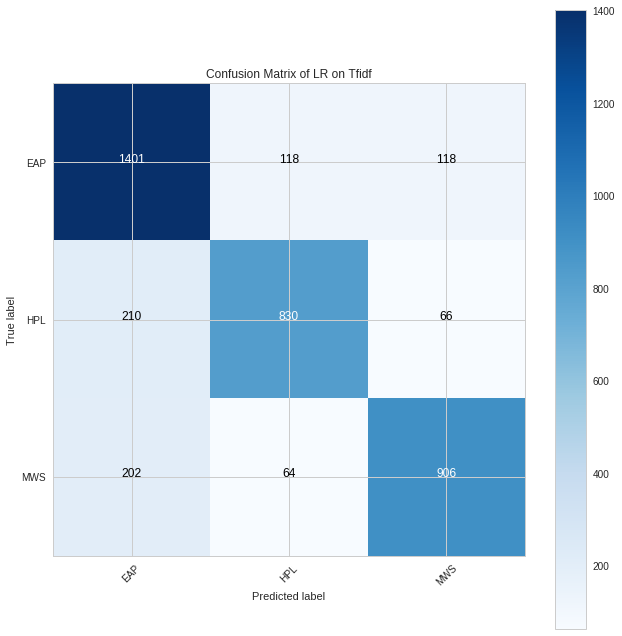

In [33]:
# plotting the confusion matrix.
cnf_matrix = confusion_matrix(y_test_tfidf_lr, np.argmax(runLR.pred,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(9,9))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'],
                      title='Confusion Matrix of LR on Tfidf')
plt.show()




In [0]:
# naive bayes on tfidf

In [0]:
def runMNB(x_train,x_test,y_train,y_test):
  clf_mnb=MultinomialNB()
  clf_mnb.fit(x_train,y_train)
  runMNB.pred=clf_mnb.predict_proba(x_test)
  return log_loss(y_test,runMNB.pred)

In [36]:
cv_scores=[]
kf=KFold(n_splits=5,shuffle=True)
for train_index,val_index in kf.split(vect_tfidf_text):
  x_train_tfidf_mnb,x_test_tfidf_mnb=vect_tfidf_text[train_index],vect_tfidf_text[val_index]
  y_train_tfidf_mnb,y_test_tfidf_mnb=Y[train_index],Y[val_index]
  cv_scores.append(runMNB(x_train_tfidf_mnb,x_test_tfidf_mnb,y_train_tfidf_mnb,y_test_tfidf_mnb))
print(sum(cv_scores)/len(cv_scores))

0.5893764415481988


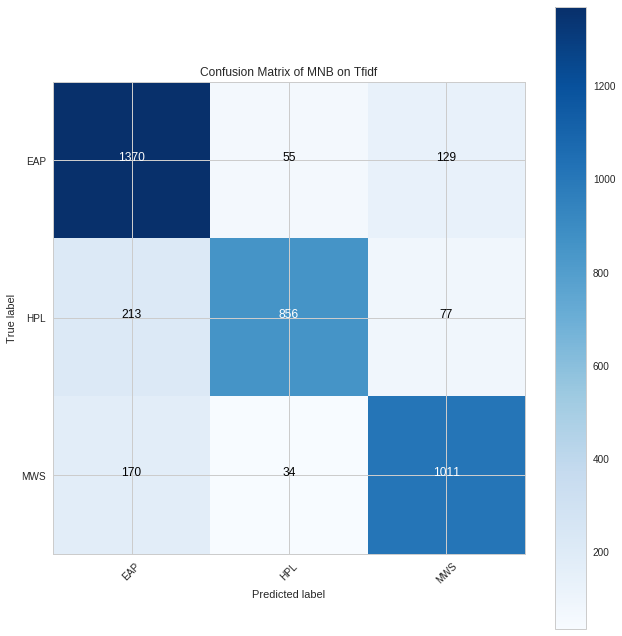

In [37]:
# plotting the confusion matrix.
cnf_matrix = confusion_matrix(y_test_tfidf_mnb, np.argmax(runMNB.pred,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(9,9))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'],
                      title='Confusion Matrix of MNB on Tfidf')
plt.show()

In [0]:
# count vectorizer

In [75]:
vect_count=CountVectorizer(ngram_range=(1,3),min_df=1)  
# traigrams workks better than bigrams. also max_features are not specified as taking all features in trigrams (440944) seems best and doesnt exceed the processing capacity also
vect_count_text=vect_count.fit_transform(df['clean_text'])
vect_count_text.shape

(19579, 440944)

In [0]:
# lr on count vectorizer

In [0]:
def runLR(x_train,x_test,y_train,y_test):
  clf_lr=LogisticRegression(C=1.0)
  clf_lr.fit(x_train,y_train)
  runLR.pred=clf_lr.predict_proba(x_test)
  return log_loss(y_test,runLR.pred)

In [42]:
cv_scores=[]
kf=KFold(n_splits=5,shuffle=True)
for train_index,val_index in kf.split(vect_count_text):
  x_train_count_lr,x_test_count_lr=vect_count_text[train_index],vect_count_text[val_index]
  y_train_count_lr,y_test_count_lr=Y[train_index],Y[val_index]
  cv_scores.append(runLR(x_train_count_lr,x_test_count_lr,y_train_count_lr,y_test_count_lr))
print(sum(cv_scores)/len(cv_scores))

0.5144571103755203


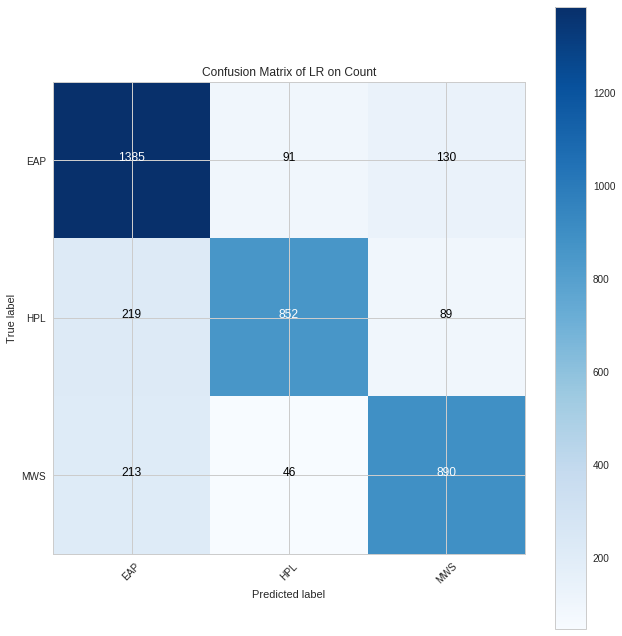

In [43]:
# plotting the confusion matrix.
cnf_matrix = confusion_matrix(y_test_count_lr, np.argmax(runLR.pred,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(9,9))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'],
                      title='Confusion Matrix of LR on Count')
plt.show()

In [0]:
# naive bayes on count vectorizer

In [0]:
def runMNB(x_train,x_test,y_train,y_test):
  runMNB.clf_mnb=MultinomialNB()
  runMNB.clf_mnb.fit(x_train,y_train)
  runMNB.pred =runMNB.clf_mnb.predict_proba(x_test)
  return log_loss(y_test,runMNB.pred)

In [55]:
cv_scores=[]
kf=KFold(n_splits=5,shuffle=True)
for train_index,val_index in kf.split(vect_count_text):
  x_train_count_mnb,x_test_count_mnb=vect_count_text[train_index],vect_count_text[val_index]
  y_train_count_mnb,y_test_count_mnb=Y[train_index],Y[val_index]
  cv_scores.append(runMNB(x_train_count_mnb,x_test_count_mnb,y_train_count_mnb,y_test_count_mnb))
print(sum(cv_scores)/len(cv_scores))


0.44843718940451227


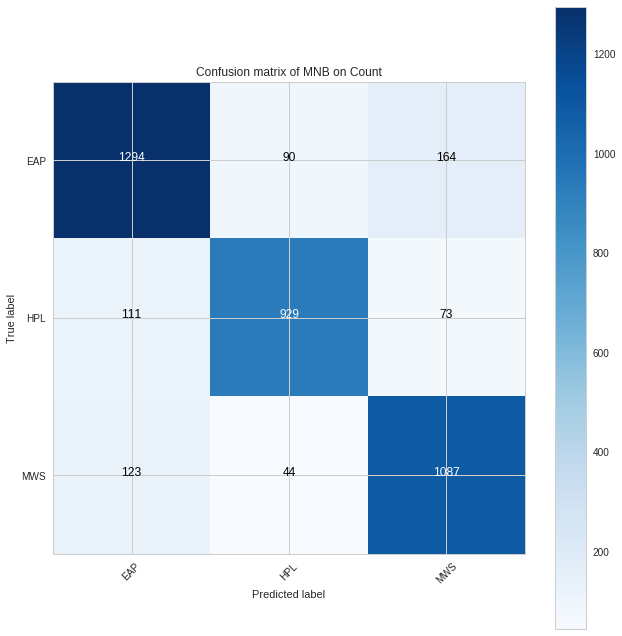

In [47]:
# plotting the confusion matrix.
cnf_matrix = confusion_matrix(y_test_count_mnb, np.argmax(runMNB.pred,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(9,9))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'],
                      title='Confusion matrix of MNB on Count')
plt.show()

In [0]:
# till now naive bayes on the features by count vectorizer gives the best validation log loss.

In [49]:
 # now e can move onto meta features ie hand crafted features. see the other accompnaying notebook.
  
 '''
 
 earlier i thought of creating a new notebook with meta features as in srk notebook (see kaggle) but I have not done as minor is coming and so am short of time. 
 
 must see srk kernel for meta feartures expplanation. 
 
 basically we can do a bit of kind off feature engg here in NLP by making features on our own and these are meta features. 
 for eg like for this dataset people on kaggle have created meta features like -- the number of unique words, the number of punctuation, average lenght of words etc
 ie basically the features which shows the writing pattern of the author and so in this way we can create a set of the meta features or the handcrafted features.
 
 another interesting thing that SRK has done is that he has merged the features from tfidf etc.. to meta features.
 now to mix dense meta features with sparse values as in tfidf 
 basically as per him what we can do is that we fit the data on training set and then predict on the validation set and use thoseprobabilities as features again.
 
 
 so what we are doing actually is that suppose say we use LR alogo(can use anyone just to show). now what we will do is that we will fit the 
 classifier clf_lr say on x_train,y_train and then predict the probabilities on val set for each author.
 therefore in output for each input data point we get a array of type [prob_class1,prob_class2,prob_class3].
 
 now we can use this as 3 features (each coming from each target class probabilities like in resukting feature each row = one data pointor instance and uski value 
 jo hai vo us author or class me jaane ki probability)

to aisa karke hummare pass jitni number of classes hai utne naye feature aa jaayenge jaha par har feature me har observation ki value us observation ki us class 
 ko belong karne ki probability hogi.
 
 ab in features ko hum dobara traiing set me combine kar denge.
 
 and now ab hum ye kaam alag alag algo ke saath kar sakte hai. and har algo ke features combine kar sakte hai ek hi say dataframe me and ispe jo chahe algo laga sakte hai.
 
 MOTE ke terms me isse expliict leakage kehte hai!!!
 
 
 **THUS THIS TECHNIQUE CAN BE USED EVRYTIME AND ANYWHERE AS THOS EFEATURES WILL ALWAYS BE GOOD (kyunki seedehe seedhe jaha us featuer ki value zyada hogi vaha vosi target class ho jaayegi) 
 PROVIDED IT  DOESN'T CAUSE OVERFITTING.**
 '''

IndentationError: ignored

In [0]:
# also see notebooks of srk and abhishek thakur on Kaggle to see xgboost and svd+svm. must watch not applied here.

In [0]:
# for submission to kaggle.

In [0]:
test['clean_text']=test['text'].apply(clean_text)

In [0]:
# vect_count_test=CountVectorizer(ngram_range=(1,3),min_df=1)  
# traigrams workks better than bigrams. also max_features are not specified as taking all features in trigrams (440944) seems best and doesnt exceed the processing capacity also
vect_count_text=vect_count.transform(test['clean_text'])


In [77]:
vect_count_text.shape

(8392, 440944)

In [0]:
pred_test_kaggle=runMNB.clf_mnb.predict_proba(vect_count_text)

In [79]:
pred_test_kaggle

array([[3.51e-02, 7.79e-04, 9.64e-01],
       [1.00e+00, 1.01e-05, 6.99e-07],
       [3.49e-01, 6.51e-01, 7.53e-06],
       ...,
       [9.82e-01, 1.22e-03, 1.65e-02],
       [9.69e-04, 8.46e-06, 9.99e-01],
       [1.28e-02, 9.87e-01, 5.90e-07]])

In [0]:
test_eap=pred_test_kaggle[:,0]
test_hpl=pred_test_kaggle[:,1]
test_mws=pred_test_kaggle[:,2]

In [89]:
test_eap

array([3.51e-02, 1.00e+00, 3.49e-01, ..., 9.82e-01, 9.69e-04, 1.28e-02])

In [0]:
d={'id':test['id'],'EAP':test_eap,'HPL':test_hpl,'MWS':test_mws}
answer=pd.DataFrame(d)
answer.to_csv('submission-bow-count-mnb.csv',index=False)
from google.colab import files
files.download('submission-bow-count-mnb.csv')

In [0]:
# this gives a multi class log loss of 0.46137 on kaggle privateLB.